Cost 함수 시각화

In [2]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X * W

In [29]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function

In [30]:
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W}) 
    W_val.append(curr_W)
    cost_val.append(curr_cost)

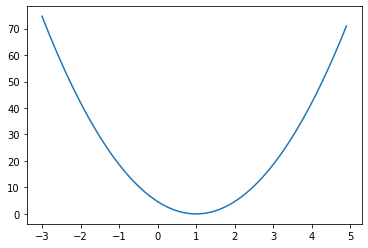

In [31]:
plt.plot(W_val, cost_val) 
plt.show()

최솟값 : w = 1
    이를 찾아야 한다.
    기울기를 보자
    

##  Gradient descent
직접 계산

In [11]:
x_data = [1, 2, 3] 
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight') 
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [12]:
# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

In [14]:
#!!#
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X) 
descent = W - learning_rate * gradient 
print(type(descent))
update = W.assign(descent)

<class 'tensorflow.python.framework.ops.Tensor'>


In [24]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer()) 

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 0.0008801329 [1.0079288]
1 0.000250351 [1.0042287]
2 7.120898e-05 [1.0022553]
3 2.0254922e-05 [1.0012028]
4 5.761145e-06 [1.0006415]
5 1.6387473e-06 [1.0003421]
6 4.662051e-07 [1.0001825]
7 1.3286792e-07 [1.0000974]
8 3.7819973e-08 [1.000052]
9 1.0820784e-08 [1.0000278]
10 3.0590854e-09 [1.0000148]
11 8.6663476e-10 [1.0000079]
12 2.407461e-10 [1.0000042]
13 7.021583e-11 [1.0000023]
14 1.9895197e-11 [1.0000012]
15 5.4143356e-12 [1.0000006]
16 1.5489832e-12 [1.0000004]
17 7.9580786e-13 [1.0000002]
18 2.9842795e-13 [1.0000001]
19 0.0 [1.]
20 0.0 [1.]


##  Gradient descent 
텐서 플로우 GradientDescentOptimizer 함수를 사용하여 자동으로 계산


In [30]:
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1) 
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100): 
    print(step, sess.run(W)) 
    sess.run(train)

0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


# Lab4

input이 여러개의 경우

In [34]:
x1_data = [73., 93., 89., 96., 73.] 
x2_data = [80., 88., 91., 98., 66.] 
x3_data = [75., 93., 90., 100., 70.] 
y_data = [152., 185., 180., 196., 142.] #정답

# placeholders for a tensor that will be always fed.
x1 = tf.placeholder(tf.float32) 
x2 = tf.placeholder(tf.float32) 
x3 = tf.placeholder(tf.float32) 
Y = tf.placeholder(tf.float32)

w1 = tf.Variable(tf.random_normal([1]), name='weight1') 
w2 = tf.Variable(tf.random_normal([1]), name='weight2') 
w3 = tf.Variable(tf.random_normal([1]), name='weight3') 
b = tf.Variable(tf.random_normal([1]), name='bias') 
hypothesis = x1 * w1 + x2 * w2 + x3 * w3 + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5) 
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer()) 
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                   feed_dict={x1: x1_data, x2: x2_data, x3: x3_data, Y: y_data})
    
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  83425.85 
Prediction:
 [-110.874054 -119.3069   -124.801125 -134.5442    -88.78263 ]
10 Cost:  15.9585705 
Prediction:
 [144.62608 187.75688 177.76881 194.94484 145.42436]
20 Cost:  15.116211 
Prediction:
 [145.41406 188.67575 178.68892 195.9448  146.11987]
30 Cost:  15.037989 
Prediction:
 [145.43132 188.66838 178.6963  195.95079 146.10893]
40 Cost:  14.960077 
Prediction:
 [145.44621 188.65819 178.70091 195.95381 146.09587]
50 Cost:  14.882611 
Prediction:
 [145.46107 188.64806 178.70549 195.9568  146.08284]
60 Cost:  14.805554 
Prediction:
 [145.47588 188.63794 178.71008 195.9598  146.06982]
70 Cost:  14.728937 
Prediction:
 [145.49063 188.62784 178.71465 195.96275 146.05685]
80 Cost:  14.652705 
Prediction:
 [145.50539 188.6178  178.71922 195.96574 146.04395]
90 Cost:  14.576904 
Prediction:
 [145.52007 188.60774 178.72375 195.96867 146.03105]
100 Cost:  14.501523 
Prediction:
 [145.53471 188.59775 178.72829 195.97163 146.01819]
110 Cost:  14.426554 
Prediction:
 [145.5493

1180 Cost:  8.348852 
Prediction:
 [146.90654 187.66089 179.15314 196.24374 144.81851]
1190 Cost:  8.307015 
Prediction:
 [146.91747 187.65341 179.15652 196.24585 144.80899]
1200 Cost:  8.265392 
Prediction:
 [146.92836 187.64595 179.1599  196.24797 144.79948]
1210 Cost:  8.22396 
Prediction:
 [146.93925 187.63853 179.16328 196.2501  144.79001]
1220 Cost:  8.182778 
Prediction:
 [146.9501  187.63112 179.16663 196.25221 144.78056]
1230 Cost:  8.14181 
Prediction:
 [146.96095 187.62376 179.17001 196.25435 144.77116]
1240 Cost:  8.101103 
Prediction:
 [146.97171 187.61638 179.17334 196.25642 144.76175]
1250 Cost:  8.060549 
Prediction:
 [146.98248 187.60902 179.1767  196.25851 144.75238]
1260 Cost:  8.020237 
Prediction:
 [146.99323 187.6017  179.18002 196.26059 144.74304]
1270 Cost:  7.980165 
Prediction:
 [147.00392 187.59439 179.18333 196.26268 144.73372]
1280 Cost:  7.940295 
Prediction:
 [147.01462 187.58713 179.18666 196.26479 144.72444]
1290 Cost:  7.90064 
Prediction:
 [147.02524 

### instance가 많아질 경우 위의 코드는 매우 좋지 않다.
아래 코드와 같이 Matrix를 사용하자

In [36]:
x_data = [[73., 80., 75.], 
          [93., 88., 93.],
          [89., 91., 90.], 
          [96., 98., 100.], 
          [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight') 
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b #matmul : matrix multiply

In [37]:
#위의 식과 같다.
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5) 
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer()) 
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict={X: x_data, Y: y_data}) #여기만 조금 달라짐 

    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  893.95715 
Prediction:
 [[177.77107]
 [216.49214]
 [211.81758]
 [231.84349]
 [164.73253]]
10 Cost:  1.2205555 
Prediction:
 [[151.33838]
 [184.7247 ]
 [180.5152 ]
 [197.7557 ]
 [140.5029 ]]
20 Cost:  1.2110684 
Prediction:
 [[151.25703]
 [184.62961]
 [180.42015]
 [197.65189]
 [140.43127]]
30 Cost:  1.2097374 
Prediction:
 [[151.2554 ]
 [184.63028]
 [180.41948]
 [197.65083]
 [140.43272]]
40 Cost:  1.2084239 
Prediction:
 [[151.25403]
 [184.63127]
 [180.41911]
 [197.65013]
 [140.4344 ]]
50 Cost:  1.207135 
Prediction:
 [[151.25266]
 [184.63226]
 [180.41876]
 [197.64944]
 [140.43607]]
60 Cost:  1.2058275 
Prediction:
 [[151.25128]
 [184.63324]
 [180.4184 ]
 [197.64871]
 [140.43771]]
70 Cost:  1.2045324 
Prediction:
 [[151.24994]
 [184.63423]
 [180.41803]
 [197.64804]
 [140.43939]]
80 Cost:  1.2032486 
Prediction:
 [[151.24855]
 [184.63518]
 [180.41766]
 [197.64731]
 [140.44102]]
90 Cost:  1.2019606 
Prediction:
 [[151.24721]
 [184.63617]
 [180.41731]
 [197.64662]
 [140.44269]]
10

960 Cost:  1.1063305 
Prediction:
 [[151.14406]
 [184.71072]
 [180.3906 ]
 [197.5892 ]
 [140.5727 ]]
970 Cost:  1.1053865 
Prediction:
 [[151.14302]
 [184.71147]
 [180.39034]
 [197.58858]
 [140.57405]]
980 Cost:  1.1044599 
Prediction:
 [[151.14201]
 [184.71223]
 [180.39008]
 [197.58798]
 [140.5754 ]]
990 Cost:  1.1035119 
Prediction:
 [[151.141  ]
 [184.71298]
 [180.38983]
 [197.58737]
 [140.57677]]
1000 Cost:  1.102598 
Prediction:
 [[151.13997]
 [184.71371]
 [180.38956]
 [197.58675]
 [140.57808]]
1010 Cost:  1.10166 
Prediction:
 [[151.13896]
 [184.71448]
 [180.38931]
 [197.58614]
 [140.57944]]
1020 Cost:  1.1007532 
Prediction:
 [[151.13792]
 [184.7152 ]
 [180.38905]
 [197.58551]
 [140.58075]]
1030 Cost:  1.0998131 
Prediction:
 [[151.13693]
 [184.71593]
 [180.3888 ]
 [197.58488]
 [140.58209]]
1040 Cost:  1.098917 
Prediction:
 [[151.13593]
 [184.71667]
 [180.38855]
 [197.58429]
 [140.5834 ]]
1050 Cost:  1.0979973 
Prediction:
 [[151.13492]
 [184.7174 ]
 [180.3883 ]
 [197.58368]
 [

1980 Cost:  1.0241576 
Prediction:
 [[151.05452]
 [184.77652]
 [180.36874]
 [197.52979]
 [140.69589]]
1990 Cost:  1.0234702 
Prediction:
 [[151.05379]
 [184.7771 ]
 [180.36859]
 [197.52927]
 [140.69699]]
2000 Cost:  1.0227814 
Prediction:
 [[151.05305]
 [184.77763]
 [180.36842]
 [197.5287 ]
 [140.69804]]


# Lab4-2

파일에서 데이터 읽어오기
 #EXAM1,EXAM2,EXAM3,FINAL 73,80,75,152
93,88,93,185
89,91,90,180
96,98,100,196 
73,66,70,142 
53,46,55,101

In [38]:
import numpy as np

In [40]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32) 
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# Make sure the shape and data are OK
print(x_data.shape, x_data, len(x_data))
print("\n")
print(y_data.shape, y_data)

(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25


(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


파이썬의 강력한 기능 : slicing

In [41]:
#위의 식과 같다.
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight') 
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b #matmul : matrix multiply

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize. Need a very small learning rate for this data set
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5) 
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer()) 
for step in range(2001):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train],
        feed_dict={X: x_data, Y: y_data}) #여기만 조금 달라짐 

    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)

0 Cost:  34402.387 
Prediction:
 [[-16.26872 ]
 [-25.537195]
 [-21.80541 ]
 [-26.139776]
 [-19.160112]
 [-18.853651]
 [-21.705717]
 [-18.826231]
 [-28.353186]
 [-32.31462 ]
 [-20.243475]
 [-23.627405]
 [-20.08687 ]
 [-13.722333]
 [-22.992228]
 [-27.682589]
 [-12.022286]
 [-26.021593]
 [-17.849154]
 [-15.836686]
 [-25.321497]
 [-26.01797 ]
 [-22.956018]
 [-10.752713]
 [-24.311975]]
10 Cost:  57.320206 
Prediction:
 [[156.75493]
 [182.45973]
 [183.11624]
 [197.05096]
 [139.4682 ]
 [ 98.12496]
 [145.37265]
 [105.05152]
 [166.06262]
 [147.79944]
 [140.72343]
 [135.11229]
 [191.61034]
 [162.24042]
 [144.86157]
 [183.3966 ]
 [155.55223]
 [174.48962]
 [183.96545]
 [164.73795]
 [170.6044 ]
 [169.12373]
 [163.8362 ]
 [163.66089]
 [191.23944]]
20 Cost:  55.25645 
Prediction:
 [[157.92487 ]
 [183.9039  ]
 [184.51833 ]
 [198.59357 ]
 [140.56616 ]
 [ 98.96302 ]
 [146.53992 ]
 [105.933365]
 [167.4402  ]
 [149.11337 ]
 [141.84332 ]
 [136.23927 ]
 [193.04355 ]
 [163.41203 ]
 [146.04164 ]
 [184.87349 ]

440 Cost:  40.39041 
Prediction:
 [[156.95988]
 [184.18124]
 [184.00175]
 [198.63086]
 [140.63994]
 [100.1111 ]
 [147.05685]
 [106.95769]
 [168.76582]
 [151.79588]
 [142.15364]
 [137.40948]
 [191.92058]
 [161.71696]
 [146.84201]
 [185.59401]
 [154.76395]
 [176.55779]
 [183.93616]
 [164.66386]
 [172.57207]
 [171.24533]
 [165.41168]
 [162.45497]
 [192.50186]]
450 Cost:  40.09834 
Prediction:
 [[156.93898]
 [184.18683]
 [183.99039]
 [198.63148]
 [140.64108]
 [100.13562]
 [147.06807]
 [106.98013]
 [168.79408]
 [151.85358]
 [142.16022]
 [137.43452]
 [191.89601]
 [161.68001]
 [146.8593 ]
 [185.60925]
 [154.72244]
 [176.57237]
 [183.90596]
 [164.63586]
 [172.58499]
 [171.2613 ]
 [165.41768]
 [162.40402]
 [192.49669]]
460 Cost:  39.80885 
Prediction:
 [[156.91821 ]
 [184.19238 ]
 [183.97905 ]
 [198.63213 ]
 [140.64223 ]
 [100.160034]
 [147.07925 ]
 [107.002495]
 [168.8222  ]
 [151.911   ]
 [142.16678 ]
 [137.45944 ]
 [191.87158 ]
 [161.64319 ]
 [146.87653 ]
 [185.62442 ]
 [154.68114 ]
 [176.58

840 Cost:  30.475927 
Prediction:
 [[156.19804 ]
 [184.38072 ]
 [183.58426 ]
 [198.65604 ]
 [140.67331 ]
 [101.0065  ]
 [147.4765  ]
 [107.796165]
 [169.79727 ]
 [153.91176 ]
 [142.39752 ]
 [138.32607 ]
 [191.01726 ]
 [160.3545  ]
 [147.48329 ]
 [186.15083 ]
 [153.22964 ]
 [177.10612 ]
 [182.82692 ]
 [163.63779 ]
 [173.05347 ]
 [171.82962 ]
 [165.6393  ]
 [160.58438 ]
 [192.30731 ]]
850 Cost:  30.26935 
Prediction:
 [[156.18079]
 [184.3851 ]
 [183.57472]
 [198.65662]
 [140.67381]
 [101.02677]
 [147.48627]
 [107.81564]
 [169.82062]
 [153.9599 ]
 [142.40312]
 [138.34688]
 [190.9966 ]
 [160.32332]
 [147.49803]
 [186.16342]
 [153.19438]
 [177.11896]
 [182.80162]
 [163.61444]
 [173.0646 ]
 [171.84285]
 [165.64465]
 [160.54173]
 [192.30272]]
860 Cost:  30.064627 
Prediction:
 [[156.16367]
 [184.38948]
 [183.56528]
 [198.65727]
 [140.67433]
 [101.04695]
 [147.49599]
 [107.83507]
 [169.84387]
 [154.00784]
 [142.40872]
 [138.3676 ]
 [190.97606]
 [160.29228]
 [147.51276]
 [186.176  ]
 [153.15929

1250 Cost:  23.312866 
Prediction:
 [[155.55539]
 [184.5399 ]
 [183.22705]
 [198.6813 ]
 [140.68439]
 [101.76286]
 [147.85025]
 [108.54172]
 [170.66843]
 [155.71782]
 [142.60977]
 [139.10532]
 [190.2401 ]
 [159.17833]
 [148.04375]
 [186.62128]
 [151.89539]
 [177.60051]
 [181.87666]
 [162.76196]
 [173.47803]
 [172.32391]
 [165.84697]
 [158.98346]
 [192.13072]]
1260 Cost:  23.167849 
Prediction:
 [[155.54128]
 [184.54332]
 [183.21913]
 [198.68193]
 [140.68443]
 [101.77952]
 [147.85873]
 [108.5586 ]
 [170.6876 ]
 [155.75784]
 [142.61453]
 [139.12254]
 [190.22282]
 [159.15215]
 [148.05634]
 [186.63165]
 [151.86554]
 [177.6118 ]
 [181.85559]
 [162.74257]
 [173.48763]
 [172.3348 ]
 [165.85175]
 [158.94797]
 [192.1267 ]]
1270 Cost:  23.02408 
Prediction:
 [[155.5272  ]
 [184.54668 ]
 [183.21124 ]
 [198.68253 ]
 [140.68443 ]
 [101.7961  ]
 [147.86717 ]
 [108.575424]
 [170.70668 ]
 [155.79765 ]
 [142.61926 ]
 [139.13966 ]
 [190.20561 ]
 [159.12604 ]
 [148.06885 ]
 [186.64197 ]
 [151.8358  ]
 [1

1680 Cost:  18.075708 
Prediction:
 [[155.00555 ]
 [184.66714 ]
 [182.91643 ]
 [198.70697 ]
 [140.67697 ]
 [102.41107 ]
 [148.18962 ]
 [109.217606]
 [171.41484 ]
 [157.2842  ]
 [142.79787 ]
 [139.77809 ]
 [189.56015 ]
 [158.14531 ]
 [148.54268 ]
 [187.02455 ]
 [150.71408 ]
 [178.05513 ]
 [181.04916 ]
 [162.00233 ]
 [173.85963 ]
 [172.74821 ]
 [166.04019 ]
 [157.59087 ]
 [191.96727 ]]
1690 Cost:  17.975407 
Prediction:
 [[154.9941  ]
 [184.6697  ]
 [182.9099  ]
 [198.70757 ]
 [140.6766  ]
 [102.424614]
 [148.19695 ]
 [109.23218 ]
 [171.43044 ]
 [157.31712 ]
 [142.80186 ]
 [139.79219 ]
 [189.54579 ]
 [158.12346 ]
 [148.55333 ]
 [187.03297 ]
 [150.68895 ]
 [178.06499 ]
 [181.03174 ]
 [161.98637 ]
 [173.86783 ]
 [172.75706 ]
 [166.04442 ]
 [157.56155 ]
 [191.9637  ]]
1700 Cost:  17.875988 
Prediction:
 [[154.9827  ]
 [184.67221 ]
 [182.90338 ]
 [198.70813 ]
 [140.67624 ]
 [102.438065]
 [148.20422 ]
 [109.24667 ]
 [171.44592 ]
 [157.3499  ]
 [142.80585 ]
 [139.80623 ]
 [189.5315  ]
 [158.10

In [42]:
# Ask my score
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X: [[100, 70, 101]]}))
print("Other scores will be ", sess.run(hypothesis, 
                                        feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))

Your score will be  [[179.76443]]
Other scores will be  [[158.42734]
 [184.71278]]


## 데이터가 아주 많을 경우 조금씩 읽어오기

In [49]:
filename_queue = tf.train.string_input_producer(
    ['data-01-test-score.csv'], shuffle=False, name='filename_queue') 
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the # decoded result.
record_defaults = [[0.], [0.], [0.], [0.]] #파일의 데이터 형태 (float)
xy = tf.decode_csv(value, record_defaults=record_defaults) #value값을 어떻게 parsing할지 정의함

# collect batches of csv in
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10) #10개씩 읽어와서 train_x_batch, y에 저장

In [44]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([3, 1]), name='weight') 
b = tf.Variable(tf.random_normal([1]), name='bias')

In [45]:
# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5) 
train = optimizer.minimize(cost)

In [46]:
 # Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(2001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch]) 
    cost_val, hy_val, _ = sess.run(
           [cost, hypothesis, train],
            feed_dict={X: x_batch, Y: y_batch}) 
    
    if step % 10 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
    
coord.request_stop() 
coord.join(threads)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
0 Cost:  43546.617 
Prediction:
 [[-58.06969 ]
 [-54.550587]
 [-61.816944]
 [-67.22793 ]
 [-37.441463]
 [-24.783443]
 [-53.77096 ]
 [-45.342743]
 [-46.863735]
 [-41.22665 ]]
10 Cost:  60.680115 
Prediction:
 [[145.71791 ]
 [190.37886 ]
 [179.5176  ]
 [195.61234 ]
 [149.34892 ]
 [112.942314]
 [142.98828 ]
 [100.54246 ]
 [182.04979 ]
 [170.82166 ]]
20 Cost:  65.854324 
Prediction:
 [[147.11278 ]
 [192.01189 ]
 [181.149   ]
 [197.38968 ]
 [150.58302 ]
 [113.848076]
 [144.33183 ]
 [101.55814 ]
 [183.56664 ]
 [172.22414 ]]
30 Cost:  65.55965 
Prediction:
 [[147.14178 ]
 [192.00314 ]
 [181.16281 ]
 [197.40532 ]
 [150.56506 ]
 [113.830635]
 [144.35664 ]
 [101.59615 ]
 [183.5491  ]
 [172.20528 ]]
40 Cost:  65.216415 
Prediction:
 [[147.16151]
 [191.9834 ]
 [181.16573]
 [197.40904]
 [150.5387 ]
 [113.80703]
 [144.37253]
 [101.62751]
 [183.52129]
 [172.17694]]
50 Cost:  64.87482 
Prediction:
 [[147.1811 ]
 [191.96

510 Cost:  51.130684 
Prediction:
 [[148.01636 ]
 [191.11386 ]
 [181.28369 ]
 [197.57199 ]
 [149.37549 ]
 [112.78106 ]
 [145.0784  ]
 [103.023186]
 [182.31082 ]
 [170.96252 ]]
520 Cost:  50.870583 
Prediction:
 [[148.03316 ]
 [191.0966  ]
 [181.28592 ]
 [197.57527 ]
 [149.35231 ]
 [112.76093 ]
 [145.09264 ]
 [103.051315]
 [182.28705 ]
 [170.93907 ]]
530 Cost:  50.61209 
Prediction:
 [[148.0499 ]
 [191.07942]
 [181.28815]
 [197.57855]
 [149.32921]
 [112.74087]
 [145.10684]
 [103.07939]
 [182.2634 ]
 [170.91573]]
540 Cost:  50.35507 
Prediction:
 [[148.06657]
 [191.06227]
 [181.29036]
 [197.58182]
 [149.3062 ]
 [112.72088]
 [145.12102]
 [103.10741]
 [182.23979]
 [170.89247]]
550 Cost:  50.099613 
Prediction:
 [[148.08322]
 [191.0452 ]
 [181.29257]
 [197.58508]
 [149.28323]
 [112.70096]
 [145.13518]
 [103.13535]
 [182.21631]
 [170.86932]]
560 Cost:  49.845512 
Prediction:
 [[148.0998  ]
 [191.02815 ]
 [181.29475 ]
 [197.58836 ]
 [149.26031 ]
 [112.6811  ]
 [145.1493  ]
 [103.163246]
 [182

1050 Cost:  39.024406 
Prediction:
 [[148.84967 ]
 [190.25069 ]
 [181.38997 ]
 [197.73938 ]
 [148.2109  ]
 [111.784355]
 [145.8041  ]
 [104.455696]
 [181.13478 ]
 [169.8209  ]]
1060 Cost:  38.833576 
Prediction:
 [[148.86377 ]
 [190.23593 ]
 [181.39168 ]
 [197.74228 ]
 [148.1909  ]
 [111.767525]
 [145.81671 ]
 [104.48061 ]
 [181.1149  ]
 [169.80197 ]]
1070 Cost:  38.643837 
Prediction:
 [[148.87782]
 [190.22122]
 [181.39337]
 [197.74518]
 [148.17096]
 [111.75074]
 [145.82932]
 [104.50547]
 [181.0951 ]
 [169.78311]]
1080 Cost:  38.45523 
Prediction:
 [[148.89185]
 [190.20656]
 [181.39507]
 [197.7481 ]
 [148.15108]
 [111.73402]
 [145.84189]
 [104.53027]
 [181.07536]
 [169.76434]]
1090 Cost:  38.26762 
Prediction:
 [[148.90579 ]
 [190.19191 ]
 [181.39676 ]
 [197.75096 ]
 [148.13123 ]
 [111.71734 ]
 [145.85443 ]
 [104.555016]
 [181.0557  ]
 [169.74564 ]]
1100 Cost:  38.081123 
Prediction:
 [[148.91974]
 [190.17734]
 [181.39845]
 [197.75386]
 [148.11145]
 [111.70073]
 [145.86696]
 [104.5797

1540 Cost:  30.838963 
Prediction:
 [[149.49042]
 [189.57512]
 [181.46495]
 [197.87462]
 [147.29198]
 [111.02061]
 [146.39088]
 [105.61228]
 [180.23357]
 [168.97545]]
1550 Cost:  30.694403 
Prediction:
 [[149.50249 ]
 [189.56229 ]
 [181.46631 ]
 [197.87723 ]
 [147.27446 ]
 [111.006256]
 [146.40219 ]
 [105.63456 ]
 [180.21661 ]
 [168.95981 ]]
1560 Cost:  30.550604 
Prediction:
 [[149.5145  ]
 [189.54947 ]
 [181.46765 ]
 [197.87982 ]
 [147.25697 ]
 [110.991936]
 [146.41347 ]
 [105.65679 ]
 [180.19972 ]
 [168.94424 ]]
1570 Cost:  30.407673 
Prediction:
 [[149.52649]
 [189.53671]
 [181.469  ]
 [197.88243]
 [147.23955]
 [110.97768]
 [146.42473]
 [105.67898]
 [180.18289]
 [168.92874]]
1580 Cost:  30.265568 
Prediction:
 [[149.53845]
 [189.52402]
 [181.47034]
 [197.88501]
 [147.22218]
 [110.96346]
 [146.43597]
 [105.70112]
 [180.16612]
 [168.9133 ]]
1590 Cost:  30.124228 
Prediction:
 [[149.55037]
 [189.51134]
 [181.47166]
 [197.8876 ]
 [147.20485]
 [110.94928]
 [146.44719]
 [105.72319]
 [180